<a href="https://colab.research.google.com/github/shadmansakibakash/python0.0/blob/main/Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [139]:
input_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI lab Project/Training.csv')
input_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


In [140]:
input_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI lab Project/Testing.csv')
input_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction


In [141]:
input_data.shape

(41, 133)

In [142]:
input_data.isnull().sum().sort_values(ascending=False)

prognosis               0
malaise                 0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
                       ..
internal_itching        0
toxic_look_(typhos)     0
depression              0
irritability            0
itching                 0
Length: 133, dtype: int64

In [143]:
input_data['prognosis'].value_counts(normalize = True)

Hypoglycemia                               0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Chronic cholestasis                        0.02439
Hyperthyroidism                            0.02439
Paralysis (brain hemorrhage)               0.02439
Allergy                                    0.02439
Hypertension                               0.02439
Varicose veins                             0.02439
Dengue                                     0.02439
Chicken pox                                0.02439
Pneumonia                                  0.02439
Common Cold                                0.02439
Dimorphic hemmorhoids(piles)               0.02439
Osteoarthristis                            0.02439
Hepatitis D                                0.02439
Acne                                       0.02439
Peptic ulcer diseae                        0.02439
Arthritis                                  0.02439
Migraine                                   0.02439
Tuberculosis                   

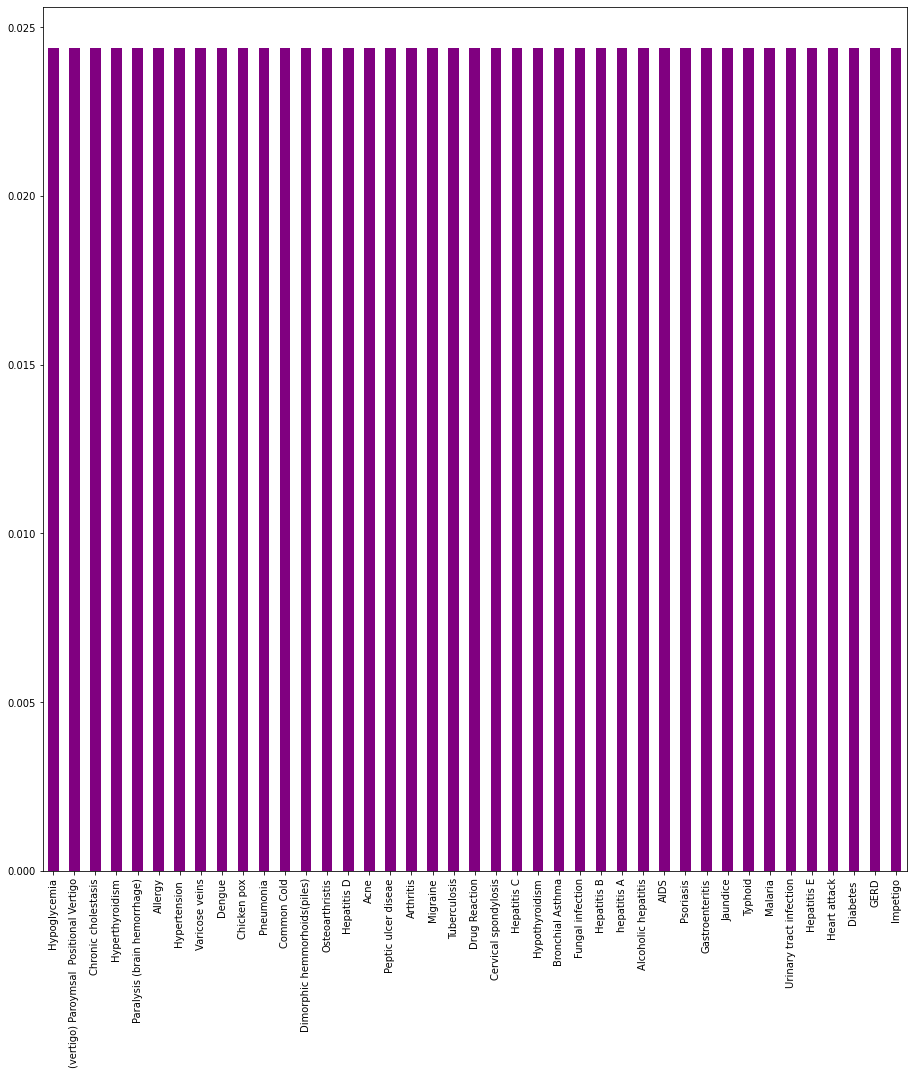

In [144]:
input_data['prognosis'].value_counts(normalize = True).plot.bar(color='Purple')
plt.subplots_adjust(left = 2, right = 4 , top = 4, bottom = 1)

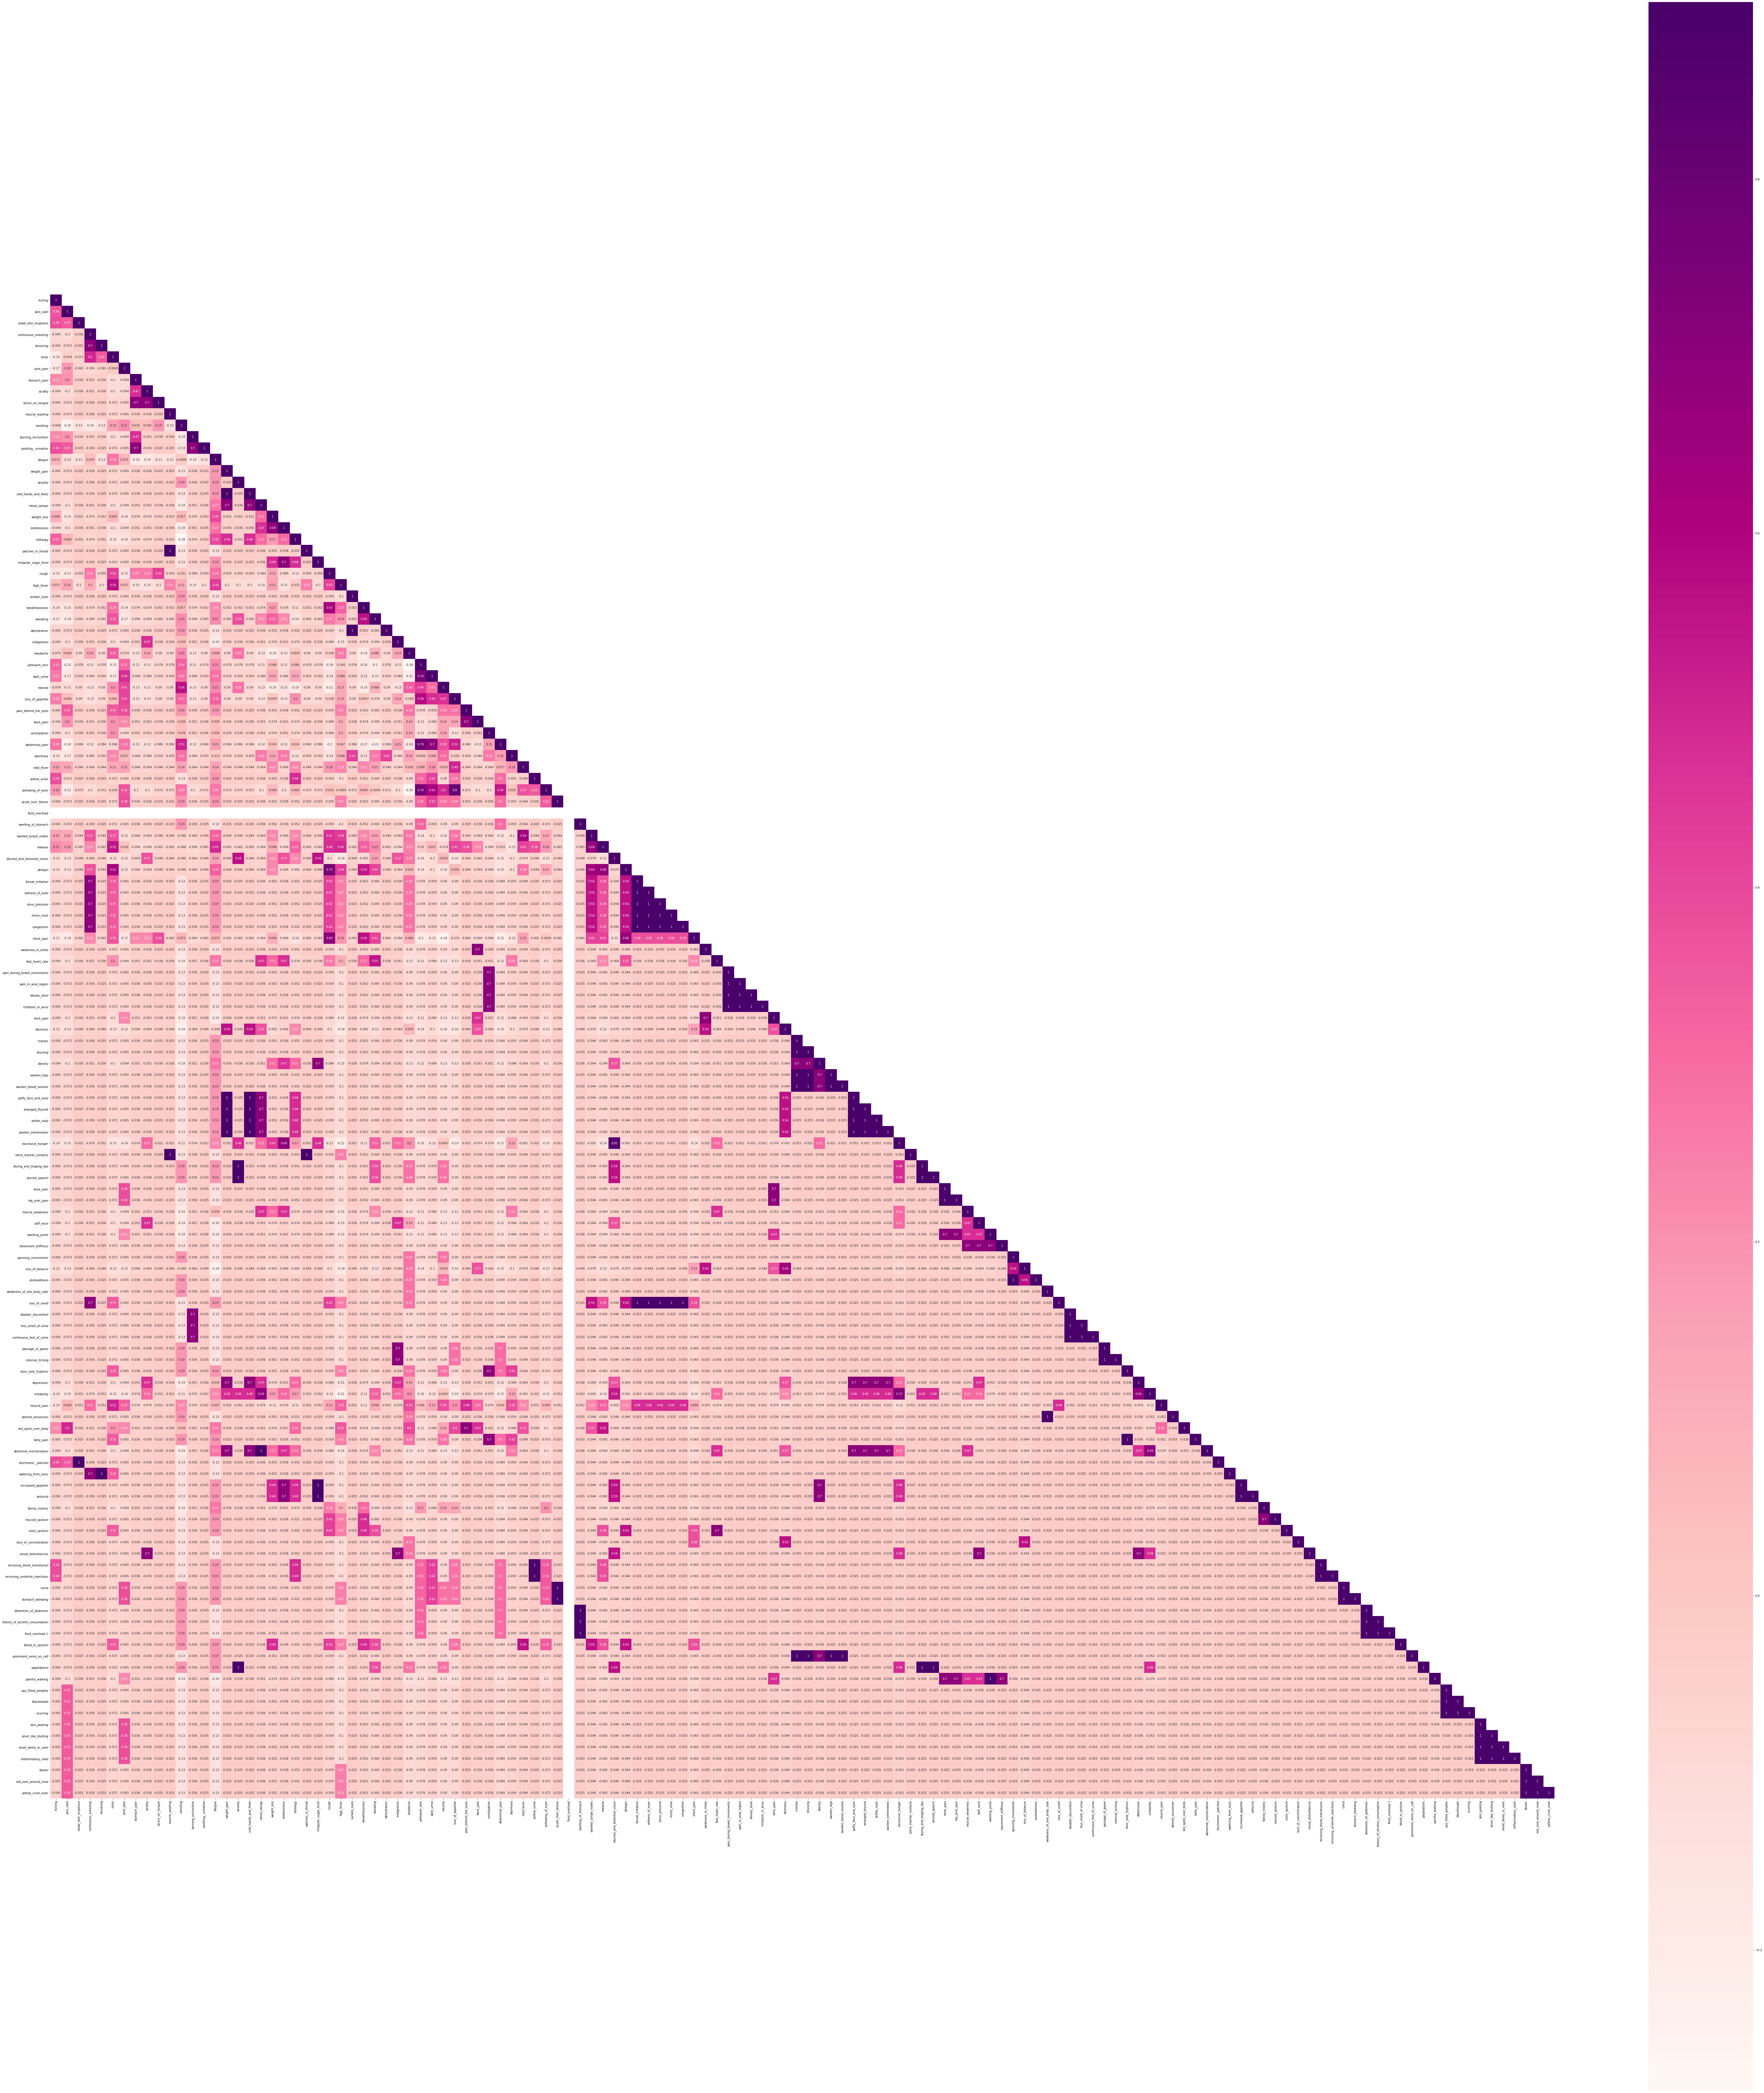

In [145]:
corr = input_data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots_adjust(left = 5, right = 20 , top = 30, bottom = 5)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="RdPu")

In [146]:
pd.crosstab(input_data['cold_hands_and_feets'],input_data['weight_gain'])

weight_gain,0,1
cold_hands_and_feets,,
0,40,0
1,0,1


In [147]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(input_data['cold_hands_and_feets'],input_data['weight_gain']))

(9.743906249999998,
 0.001799181531053096,
 1,
 array([[3.90243902e+01, 9.75609756e-01],
        [9.75609756e-01, 2.43902439e-02]]))

In [148]:
l1 = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
      'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
      'spotting_ urination', 'fatigue',
      'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
      'patches_in_throat',
      'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration',
      'indigestion',
      'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
      'constipation',
      'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
      'fluid_overload',
      'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm',
      'throat_irritation',
      'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs',
      'fast_heart_rate',
      'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'neck_pain',
      'dizziness', 'cramps',
      'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid',
      'brittle_nails',
      'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech',
      'knee_pain', 'hip_joint_pain',
      'muscle_weakness', 'stiff_neck', 'swelling_joints', 'movement_stiffness', 'spinning_movements', 'loss_of_balance',
      'unsteadiness', 'weakness_of_one_body_side',
      'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases',
      'internal_itching', 'toxic_look_(typhos)',
      'depression', 'irritability', 'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 'belly_pain',
      'abnormal_menstruation', 'dischromic _patches',
      'watering_from_eyes', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum',
      'lack_of_concentration', 'visual_disturbances',
      'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding',
      'distention_of_abdomen', 'history_of_alcohol_consumption',
      'fluid_overload', 'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations', 'painful_walking',
      'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
      'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose',
      'yellow_crust_ooze']

In [149]:
disease = ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction',
           'Peptic ulcer diseae', 'AIDS', 'Diabetes', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension',
           ' Migraine', 'Cervical spondylosis',
           'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
           'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis',
           'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)',
           'Heartattack', 'Varicoseveins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis',
           'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis',
           'Impetigo']

In [150]:
l2 = []
for x in range(0, len(l1)):
    l2.append(0)

In [151]:
# TESTING DATA
tr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI lab Project/Testing.csv")
tr.replace({'prognosis': {'Fungal infection': 0, 'Allergy': 1, 'GERD': 2, 'Chronic cholestasis': 3, 'Drug Reaction': 4,
                          'Peptic ulcer diseae': 5, 'AIDS': 6, 'Diabetes ': 7, 'Gastroenteritis': 8,
                          'Bronchial Asthma': 9, 'Hypertension ': 10,
                          'Migraine': 11, 'Cervical spondylosis': 12,
                          'Paralysis (brain hemorrhage)': 13, 'Jaundice': 14, 'Malaria': 15, 'Chicken pox': 16,
                          'Dengue': 17, 'Typhoid': 18, 'hepatitis A': 19,
                          'Hepatitis B': 20, 'Hepatitis C': 21, 'Hepatitis D': 22, 'Hepatitis E': 23,
                          'Alcoholic hepatitis': 24, 'Tuberculosis': 25,
                          'Common Cold': 26, 'Pneumonia': 27, 'Dimorphic hemmorhoids(piles)': 28, 'Heart attack': 29,
                          'Varicose veins': 30, 'Hypothyroidism': 31,
                          'Hyperthyroidism': 32, 'Hypoglycemia': 33, 'Osteoarthristis': 34, 'Arthritis': 35,
                          '(vertigo) Paroymsal  Positional Vertigo': 36, 'Acne': 37, 'Urinary tract infection': 38,
                          'Psoriasis': 39,
                          'Impetigo': 40}}, inplace=True)

In [152]:
X_test = tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [153]:
# TRAINING DATA
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI lab Project/Training.csv")

df.replace({'prognosis': {'Fungal infection': 0, 'Allergy': 1, 'GERD': 2, 'Chronic cholestasis': 3, 'Drug Reaction': 4,
                          'Peptic ulcer diseae': 5, 'AIDS': 6, 'Diabetes ': 7, 'Gastroenteritis': 8,
                          'Bronchial Asthma': 9, 'Hypertension ': 10,
                          'Migraine': 11, 'Cervical spondylosis': 12,
                          'Paralysis (brain hemorrhage)': 13, 'Jaundice': 14, 'Malaria': 15, 'Chicken pox': 16,
                          'Dengue': 17, 'Typhoid': 18, 'hepatitis A': 19,
                          'Hepatitis B': 20, 'Hepatitis C': 21, 'Hepatitis D': 22, 'Hepatitis E': 23,
                          'Alcoholic hepatitis': 24, 'Tuberculosis': 25,
                          'Common Cold': 26, 'Pneumonia': 27, 'Dimorphic hemmorhoids(piles)': 28, 'Heart attack': 29,
                          'Varicose veins': 30, 'Hypothyroidism': 31,
                          'Hyperthyroidism': 32, 'Hypoglycemia': 33, 'Osteoarthristis': 34, 'Arthritis': 35,
                          '(vertigo) Paroymsal  Positional Vertigo': 36, 'Acne': 37, 'Urinary tract infection': 38,
                          'Psoriasis': 39,
                          'Impetigo': 40}}, inplace=True)

In [154]:
X = df[l1]
y = df[["prognosis"]]
np.ravel(y)

array([ 0,  0,  0, ..., 38, 39, 40])

Multinomial Naive Bayes test accuracy score 

In [155]:
    from sklearn.naive_bayes import MultinomialNB
    mnb = MultinomialNB()
    mnb = mnb.fit(X, np.ravel(y))
    from sklearn.metrics import accuracy_score
    y_pred = mnb.predict(X_test)
    print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 1.0


K-Fold Cross-Validation test accuracy score

In [156]:
from sklearn.model_selection import KFold

## Function to run multiple algorithms with different K values of KFold.
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = input_data
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ",i)
    return(train_scores,test_scores)

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)

In [158]:
algo_dict = {'l_o_g':log,'d_t':dt,'r_a_n':ran,'N_B' : nb, 'G_B' : gbm}
algo_train_scores={}
algo_test_scores={}

In [159]:
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(input_data,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

l_o_g
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
d_t
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
r_a_n
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
N_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
G_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 0.9674731182795699, 6: 1.0, 8: 0.9861111111111112, 10: 0.9891891891891893}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'G_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'l_o_g': {2: 0.0, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0}, 'd_t': {2: 0.0, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0}, 'r_a_n': {2: 0.0, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0}, 'N_B': {2: 0.0, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0}, 'G_B': {2: 0.0, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0}}


In [160]:
#building the model at k value 2 
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = input_data
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = gbm.fit(x_train,y_train)
        sum_train += gbm.score(x_train,y_train)
        y_pred = gbm.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)

kvalue:  2


In [161]:
print(train_scores)


{2: 1.0}


In [162]:
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]

In [163]:
features = input_data.columns[:-1]
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 47 - swelled_lymph_nodes (0.047623)
2. feature 109 - lack_of_concentration (0.047619)
3. feature 9 - ulcers_on_tongue (0.047619)
4. feature 28 - sweating (0.047619)
5. feature 36 - pain_behind_the_eyes (0.047619)


In [164]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [165]:
feature_dict['redness_of_eyes'], feature_dict['cough']

(52, 24)

In [166]:
sample_x = [i/52 if i ==52 else i/24 if i==24 else i*0 for i in range(len(features))]
len(sample_x)

132

In [167]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))
gbm.predict(sample_x)

array(['hepatitis A'], dtype=object)

In [168]:
gbm.predict_proba(sample_x)

array([[0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905,
        0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905,
        0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905,
        0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905,
        0.04761905]])

In [169]:
gbm.__getstate__()

{'_rng': RandomState(MT19937) at 0x7F373E16A050,
 '_sklearn_version': '0.22.2.post1',
 'alpha': 0.9,
 'ccp_alpha': 0.0,
 'classes_': array(['AIDS', 'Allergy', 'Bronchial Asthma', 'Cervical spondylosis',
        'Chicken pox', 'Chronic cholestasis', 'Dengue', 'Diabetes ',
        'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis',
        'Hepatitis B', 'Hypertension ', 'Jaundice', 'Malaria', 'Migraine',
        'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Typhoid',
        'hepatitis A'], dtype=object),
 'criterion': 'friedman_mse',
 'estimators_': array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=RandomState(MT19937) at 0